A.  Image Transform
Perform Discrete Fourier Transform, Z- transform KL Transform on a gray scale image.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


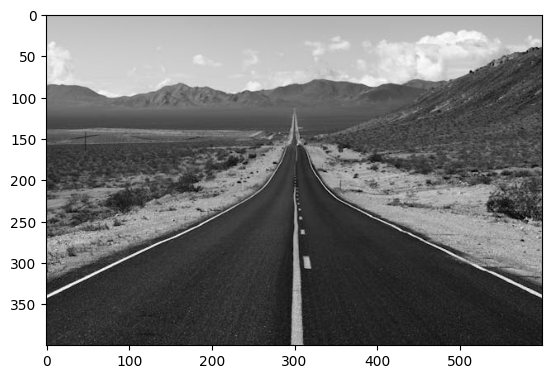

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
image = plt.imread('/content/drive/MyDrive/img_2.jpeg')
plt.imshow(image)

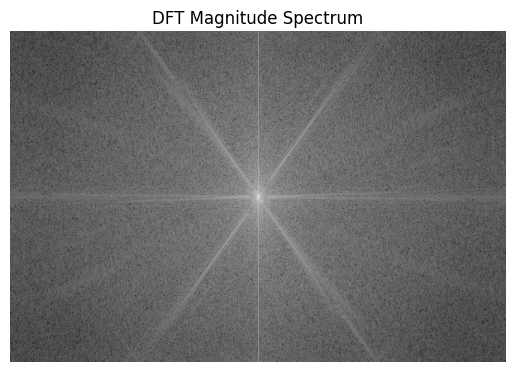

In [ ]:
from scipy.fft import fft2, fftshift

image = plt.imread('/content/drive/MyDrive/img_2.jpeg')

# Convert to grayscale (average the R, G, B channels if the image is color)
if image.ndim == 3:
    image = np.mean(image, axis=2)

# Apply 2D FFT
dft_image = fft2(image)

# Shift zero-frequency component to the center
dft_image_shifted = fftshift(dft_image)

# Calculate magnitude spectrum (log scale)
magnitude_spectrum = np.log(np.abs(dft_image_shifted) + 1)

# Normalize the magnitude spectrum to the range [0, 1] for better visualization
magnitude_spectrum = np.abs(magnitude_spectrum)  # Take the absolute value
magnitude_spectrum /= np.max(magnitude_spectrum)  # Normalize to [0, 1]

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.axis('off')  # Hide axes for better visualization
plt.show()


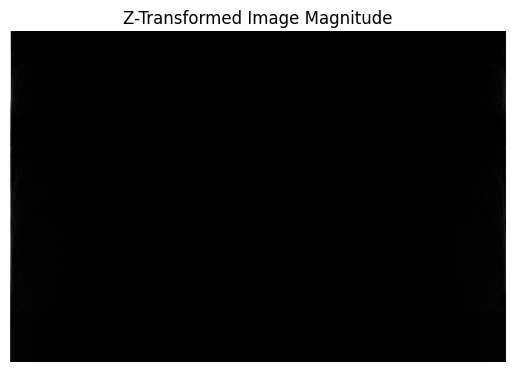

In [ ]:


# Load the image (grayscale)
image = plt.imread('/content/drive/MyDrive/img_2.jpeg')

if image.ndim == 3:
    image = np.mean(image, axis=2)

# Z-transform implementation for 1D sequence
def z_transform_1d(sequence):
    N = len(sequence)
    z = np.exp(1j * 2 * np.pi * np.arange(N) / N)  # Unit circle in the complex plane
    return np.array([np.sum(sequence * np.power(z, -n)) for n in range(N)])

# Apply Z-transform to each row of the grayscale image
z_transformed_image = np.array([z_transform_1d(row) for row in image])

# Visualize the magnitude of the Z-transformed image (absolute value)
plt.imshow(np.abs(z_transformed_image), cmap='gray')
plt.title('Z-Transformed Image Magnitude')
plt.axis('off')  # Turn off axis for better visualization
plt.show()


In [ ]:
print(image.shape)  # Check the dimensions of the image


(750, 1125, 3)


KL Transform

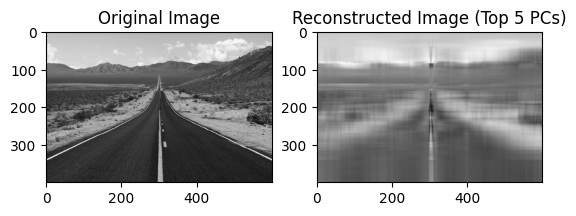

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
image = plt.imread('/content/drive/MyDrive/img_2.jpeg')
image = np.mean(image, axis=2) if len(image.shape) > 2 else image  # Convert to grayscale

# Flatten the image row-wise, treating each row as a sample and each pixel as a feature
image_flat = image.reshape(image.shape[0], -1)  # Now each row is a sample, and each column is a feature

# Step 3: Center the data (subtract the mean)
mean_image = np.mean(image_flat, axis=1, keepdims=True)  # Calculate the mean across each row
centered_image = image_flat - mean_image  # Center the data by subtracting the row mean

# Step 4: Calculate the covariance matrix (for KL, it's essentially a PCA covariance matrix)
cov_matrix = np.cov(centered_image.T)  # Covariance across features (columns)

# Step 5: Eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 6: Sort the eigenvectors by eigenvalues (in descending order)
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort indices by eigenvalue magnitude
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Step 7: Project the image onto the eigenvectors (select top k components)
k = 5  # You can select how many components to keep
top_eigenvectors = sorted_eigenvectors[:, :k]
projected_image = np.dot(centered_image, top_eigenvectors)

# Step 8: Reconstruct the image from the top k eigenvectors
# Ensure the mean is broadcast correctly to match the reconstructed image
reconstructed_image = np.dot(projected_image, top_eigenvectors.T) + mean_image  # No transpose here

# Reshape back to the original image shape (for visualization)
reconstructed_image = reconstructed_image.reshape(image.shape)

# Ensure we take the real part in case there are any complex values
reconstructed_image = np.real(reconstructed_image)

# Display the original and reconstructed images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f"Reconstructed Image (Top {k} PCs)")

plt.show()


B. Intensity Transformation and Histogram Processing
1. Implement histogram equalization and matching on a grayscale image. Compare the results
visually and quantitatively using metrics like entropy.

2. Design a contrast enhancement technique for images with low contrast. Apply it to a real-
world image and evaluate its effectiveness.

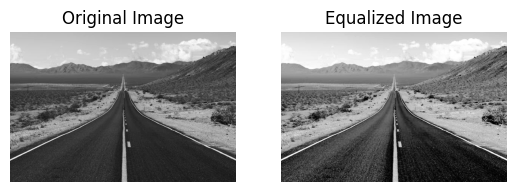

Original Image Entropy: 7.491741762244758
Equalized Image Entropy: 7.491741762244758


In [ ]:
# Histogram equalization
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Load image (grayscale)
image = plt.imread('/content/drive/MyDrive/img_2.jpeg')
if image.ndim == 3:  # If the image is RGB, convert to grayscale
    image = np.mean(image, axis=2)

# Apply Histogram Equalization
equalized_image = exposure.equalize_hist(image)

# Plot original and equalized image side by side
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

plt.show()

# Optionally, calculate and compare histogram metrics (e.g., entropy)
from skimage.measure import shannon_entropy
original_entropy = shannon_entropy(image)
equalized_entropy = shannon_entropy(equalized_image)

print(f"Original Image Entropy: {original_entropy}")
print(f"Equalized Image Entropy: {equalized_entropy}")


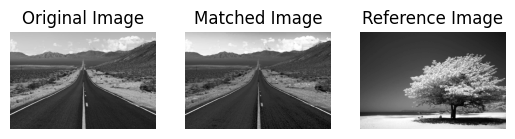

Matched Image Entropy: 7.096344912075416
Reference Image Entropy: 7.5079193542784175


In [ ]:
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt

# Load the original image and the reference image
image = plt.imread('/content/drive/MyDrive/img_2.jpeg')
reference_image = plt.imread('/content/drive/MyDrive/img_1.jpeg')

# Convert to grayscale if they are RGB images
if image.ndim == 3:
    image = np.mean(image, axis=2)

if reference_image.ndim == 3:
    reference_image = np.mean(reference_image, axis=2)

# Perform histogram matching
matched_image = exposure.match_histograms(image, reference_image)

# Plot original, matched, and reference images
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(matched_image, cmap='gray')
plt.title("Matched Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(reference_image, cmap='gray')
plt.title("Reference Image")
plt.axis('off')

plt.show()

# Assuming you have a function to calculate entropy
def shannon_entropy(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=(0, 255))
    hist = hist / hist.sum()  # Normalize the histogram
    hist = hist[hist > 0]  # Remove zeros to avoid log(0)
    return -np.sum(hist * np.log2(hist))

# Calculate and print the entropies of the images
matched_entropy = shannon_entropy(matched_image)
reference_entropy = shannon_entropy(reference_image)

print(f"Matched Image Entropy: {matched_entropy}")
print(f"Reference Image Entropy: {reference_entropy}")


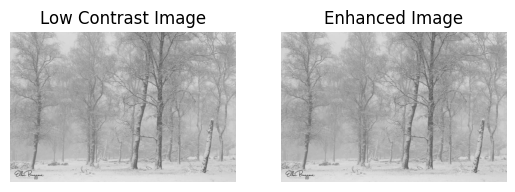

Low Contrast Image Entropy: 6.287738427979622
Enhanced Image Entropy: 6.571347149995754


In [ ]:
# Contrast Enhancement for Low Contrast Images

def contrast_stretching(image):
    # Find the min and max pixel values
    r_min = np.min(image)
    r_max = np.max(image)

    # Apply contrast stretching formula
    stretched_image = (image - r_min) / (r_max - r_min) * 255

    # Clip to ensure values are within [0, 255]
    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)

    return stretched_image

low_contrast_image = plt.imread('/content/drive/MyDrive/Low_contrast_pic.jpg')
if low_contrast_image.ndim == 3:
    low_contrast_image = np.mean(low_contrast_image, axis=2)

# Apply contrast stretching
enhanced_image = contrast_stretching(low_contrast_image)

plt.subplot(1, 2, 1)
plt.imshow(low_contrast_image, cmap='gray')
plt.title("Low Contrast Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Enhanced Image")
plt.axis('off')

plt.show()

low_contrast_entropy = shannon_entropy(low_contrast_image)
enhanced_entropy = shannon_entropy(enhanced_image)

print(f"Low Contrast Image Entropy: {low_contrast_entropy}")
print(f"Enhanced Image Entropy: {enhanced_entropy}")


C. Frequency Domain Processing
1. Implement the 2D Discrete Fourier Transform (DFT) and its inverse.
2. Design low-pass, high-pass, and band-pass filters in the frequency domain. Apply them to an
image and analyze the results.
3. Implement homomorphic filtering and apply it to an image with uneven illumination.

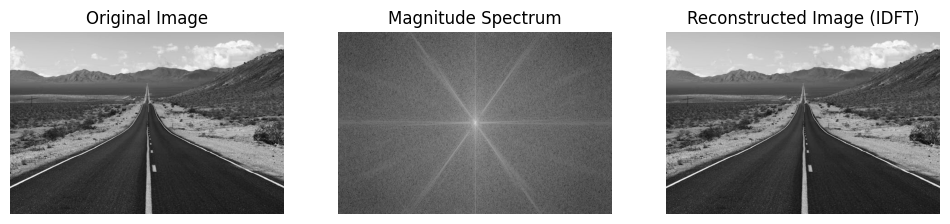

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

image = plt.imread('/content/drive/MyDrive/img_2.jpeg')
if image.ndim == 3:
    image = np.mean(image, axis=2)

# Step 1: Compute the 2D DFT
dft_image = fft2(image)

# Step 2: Shift the zero-frequency component to the center
dft_image_shifted = fftshift(dft_image)

# Step 3: Compute the magnitude and phase spectra
magnitude = np.abs(dft_image_shifted)
phase = np.angle(dft_image_shifted)

# Step 4: Inverse DFT to reconstruct the image
inverse_dft_image = ifft2(ifftshift(dft_image_shifted)).real  # Take the real part to avoid complex numbers


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + magnitude), cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(inverse_dft_image, cmap='gray')
plt.title("Reconstructed Image (IDFT)")
plt.axis('off')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# Read the image
image = plt.imread('/content/drive/MyDrive/img_2.jpeg')

# If the image is RGB, convert it to grayscale (assuming it's 3 channels)
if image.ndim == 3:
    image = np.mean(image, axis=2)

# Function to create the frequency domain filters
def create_filter(filter_type, shape, cutoff_freq, band_width=None):
    rows, cols = shape
    u = np.fft.fftfreq(rows, d=1/rows)
    v = np.fft.fftfreq(cols, d=1/cols)
    U, V = np.meshgrid(u, v)

    D = np.sqrt(U**2 + V**2)  # Distance from the center (origin) in frequency space

    if filter_type == 'lowpass':
        H = np.double(D <= cutoff_freq)
    elif filter_type == 'highpass':
        H = np.double(D > cutoff_freq)
    elif filter_type == 'bandpass' and band_width is not None:
        H = np.double((D >= cutoff_freq - band_width/2) & (D <= cutoff_freq + band_width/2))
    else:
        raise ValueError("Invalid filter type or missing band_width for bandpass filter.")

    return H

# Filter design parameters
cutoff_freq = 0.1  # Low-pass filter cutoff frequency
band_width = 0.05  # Band-pass filter width

# Step 1: Create frequency domain filters
lowpass_filter = create_filter('lowpass', image.shape, cutoff_freq)
highpass_filter = create_filter('highpass', image.shape, cutoff_freq)
bandpass_filter = create_filter('bandpass', image.shape, cutoff_freq, band_width)

# Step 2: Apply filters in the frequency domain
dft_image_shifted = fftshift(fft2(image))

# Ensure the filter shape matches the DFT image shape
lowpass_filter = lowpass_filter[:dft_image_shifted.shape[0], :dft_image_shifted.shape[1]]
highpass_filter = highpass_filter[:dft_image_shifted.shape[0], :dft_image_shifted.shape[1]]
bandpass_filter = bandpass_filter[:dft_image_shifted.shape[0], :dft_image_shifted.shape[1]]

# Multiply the DFT of the image by the filter
lowpass_image = np.real(ifft2(ifftshift(dft_image_shifted * lowpass_filter)))
highpass_image = np.real(ifft2(ifftshift(dft_image_shifted * highpass_filter)))
bandpass_image = np.real(ifft2(ifftshift(dft_image_shifted * bandpass_filter)))

# Plot the results
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(lowpass_image, cmap='gray')
plt.title("Low-pass Filtered Image")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(highpass_image, cmap='gray')
plt.title("High-pass Filtered Image")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(bandpass_image, cmap='gray')
plt.title("Band-pass Filtered Image")
plt.axis('off')

plt.show()


ValueError: operands could not be broadcast together with shapes (400,600) (400,400) 

In [ ]:
def homomorphic_filtering(image, cutoff_freq=0.1, gamma_high=2, gamma_low=0.5):
    # Step 1: Take the logarithm of the image (for illumination/reflection separation)
    image_log = np.log1p(image)

    # Step 2: Apply 2D DFT
    dft_image = fft2(image_log)
    dft_image_shifted = fftshift(dft_image)

    # Step 3: Create a high-pass filter in the frequency domain
    rows, cols = image.shape
    filter_mask = create_filter('highpass', image.shape, cutoff_freq)

    # Step 4: Apply the filter
    filtered_dft_image = dft_image_shifted * filter_mask

    # Step 5: Inverse DFT to get the result
    filtered_image = np.real(ifft2(ifftshift(filtered_dft_image)))

    # Step 6: Exponentiate the result to get the final image
    homomorphic_result = np.expm1(filtered_image)

    # Step 7: Clip the values to the range [0, 255]
    homomorphic_result = np.clip(homomorphic_result, 0, 255)

    return homomorphic_result

# Step 1: Apply homomorphic filtering
homomorphic_image = homomorphic_filtering(image, cutoff_freq=0.1)

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(homomorphic_image, cmap='gray')
plt.title("Homomorphic Filtered Image")
plt.axis('off')

plt.show()


ValueError: operands could not be broadcast together with shapes (400,600) (600,400) 

D. Color image Processing
1. Implement color space conversions between RGB, HSI, and YCbCr color models.
2. Perform color histogram equalization on a color image and analyze the results.
3. Implement color edge detection using Sobel or Canny operators.

<ipython-input-14-b6e998c8c713>:20: RuntimeWarning: invalid value encountered in divide
  S = 1 - (3 * numerator / denominator)
<ipython-input-14-b6e998c8c713>:26: RuntimeWarning: invalid value encountered in divide
  H = np.arccos(delta / numerator) / (2 * np.pi) * 360
/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:489: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


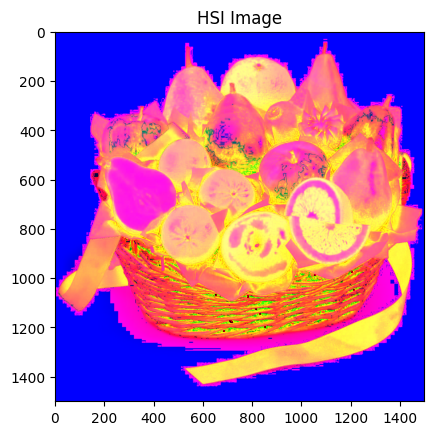

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to convert RGB to HSI
def rgb_to_hsi(rgb_image):
    # Normalize the RGB values to the range [0, 1]
    rgb_image = rgb_image / 255.0

    # Extract the individual RGB channels
    R = rgb_image[:, :, 0]
    G = rgb_image[:, :, 1]
    B = rgb_image[:, :, 2]

    # Calculate Intensity
    I = (R + G + B) / 3

    # Calculate Saturation
    numerator = np.minimum(np.minimum(R, G), B)
    denominator = R + G + B
    S = 1 - (3 * numerator / denominator)

    # Calculate Hue
    delta = 0.5 * ((R - G) + (R - B))
    numerator = np.sqrt((R - G) ** 2 + (R - B) * (G - B))
    denominator = R + G + B
    H = np.arccos(delta / numerator) / (2 * np.pi) * 360

    # Handle case where hue cannot be calculated (denominator is 0)
    H[np.isnan(H)] = 0

    return np.dstack((H, S, I))


image = plt.imread('/content/drive/MyDrive/rgb_pic.jpg')
hsi_image = rgb_to_hsi(image)

plt.imshow(hsi_image)
plt.title('HSI Image')
plt.show()


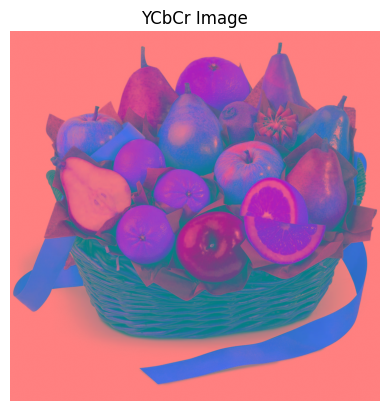

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_ycbcr(rgb_image):
    # Convert RGB to YCbCr using standard formula
    Y = 0.299 * rgb_image[:, :, 0] + 0.587 * rgb_image[:, :, 1] + 0.114 * rgb_image[:, :, 2]
    Cb = -0.169 * rgb_image[:, :, 0] - 0.331 * rgb_image[:, :, 1] + 0.5 * rgb_image[:, :, 2] + 128
    Cr = 0.5 * rgb_image[:, :, 0] - 0.419 * rgb_image[:, :, 1] - 0.081 * rgb_image[:, :, 2] + 128

    # Stack the results into a single image (Y, Cb, Cr)
    return np.dstack((Y, Cb, Cr))

# Function to fix image range before displaying (for RGB or other images)
def fix_image_range(image):
    # If image is a floating-point image, ensure values are within [0, 1]
    if image.max() > 1.0:
        image = image / 255.0  # Ensure it's between 0 and 1 for imshow
    elif image.max() <= 1.0:
        # Convert float images to [0, 255] range (clipping any values outside)
        image = np.clip(image * 255, 0, 255).astype(np.uint8)  # Scale back to [0, 255] for imshow
    return image

image = plt.imread('/content/drive/MyDrive/rgb_pic.jpg')

# Convert RGB image to YCbCr
ycbcr_image = rgb_to_ycbcr(image)

# Fix image range before displaying
ycbcr_image_fixed = fix_image_range(ycbcr_image)

plt.imshow(ycbcr_image_fixed)
plt.title('YCbCr Image')
plt.axis('off')
plt.show()


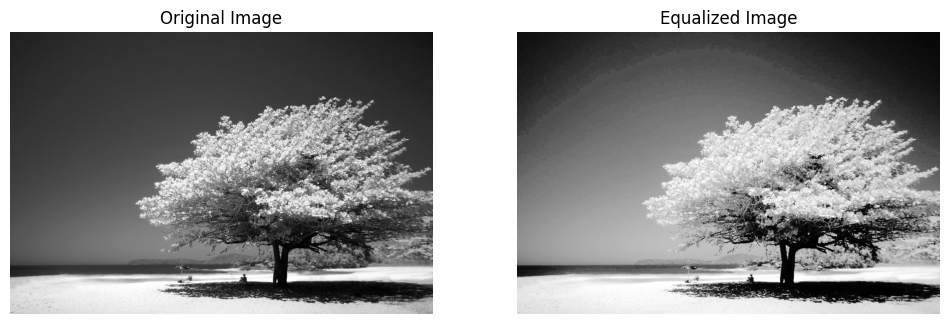

In [ ]:
import cv2

def histogram_equalization_color(image):
    # Convert the image from RGB to YCbCr
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

    # Split the YCbCr image into its Y, Cb, Cr channels
    Y, Cb, Cr = cv2.split(ycbcr_image)

    # Apply histogram equalization on the Y (luminance) channel
    Y_eq = cv2.equalizeHist(Y)

    # Merge the channels back together
    equalized_image = cv2.merge([Y_eq, Cb, Cr])

    # Convert back to RGB color space
    equalized_rgb = cv2.cvtColor(equalized_image, cv2.COLOR_YCrCb2RGB)

    return equalized_rgb

# Example usage:
image = cv2.imread('/content/drive/MyDrive/img_1.jpeg')  # Use OpenCV to read image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

equalized_image = histogram_equalization_color(image_rgb)

# Display original and equalized images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image)
plt.title('Equalized Image')
plt.axis('off')

plt.show()


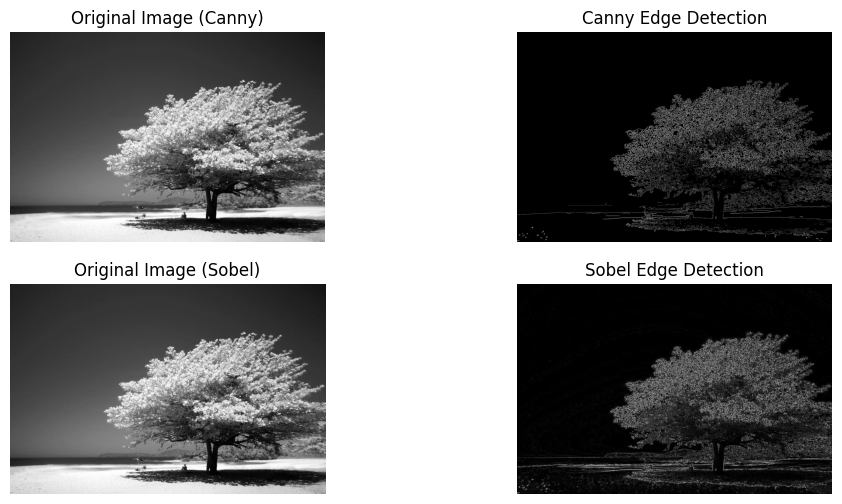

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to perform color edge detection using Canny operator
def canny_edge_detection(image_path, low_threshold=100, high_threshold=200):
    # Load the color image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, low_threshold, high_threshold)

    # Convert edges to a 3 channel image to blend with the original color image
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Combine the edges with the original color image
    result = cv2.bitwise_and(image, edges_colored)

    return image, result

# Function to perform color edge detection using Sobel operator
def sobel_edge_detection(image_path):
    # Load the color image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Sobel operator in the x direction (gradient in the horizontal direction)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)

    # Apply Sobel operator in the y direction (gradient in the vertical direction)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate the magnitude of gradients (edge strength)
    sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

    # Convert the magnitude to a scale from 0 to 255
    sobel_magnitude = np.uint8(np.absolute(sobel_magnitude))

    # Convert the edge-detected image back to color
    sobel_colored = cv2.cvtColor(sobel_magnitude, cv2.COLOR_GRAY2BGR)

    # Combine the edges with the original color image
    result = cv2.bitwise_and(image, sobel_colored)

    return image, result

# Function to visualize both edge detection results (Canny and Sobel)
def visualize_edge_detection(image_path):
    # Perform Canny edge detection
    original_canny, result_canny = canny_edge_detection(image_path)

    # Perform Sobel edge detection
    original_sobel, result_sobel = sobel_edge_detection(image_path)

    # Display the original and edge-detected images for both methods
    plt.figure(figsize=(12, 6))

    # Canny results
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(original_canny, cv2.COLOR_BGR2RGB))
    plt.title('Original Image (Canny)')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(result_canny, cv2.COLOR_BGR2RGB))
    plt.title('Canny Edge Detection')
    plt.axis('off')

    # Sobel results
    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(original_sobel, cv2.COLOR_BGR2RGB))
    plt.title('Original Image (Sobel)')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(result_sobel, cv2.COLOR_BGR2RGB))
    plt.title('Sobel Edge Detection')
    plt.axis('off')

    plt.show()

# Call the function with an image path (replace 'your_image_path.jpg' with your image file)
image_path = '/content/drive/MyDrive/img_1.jpeg'
visualize_edge_detection(image_path)


E. Additional Practical Questions

5. Image Segmentation: Implement thresholding, region-based, and edge-based segmentation
techniques.
6. Image Morphological Processing: Perform erosion, dilation, opening, and closing operations
on binary images.
7. Image Registration: Implement image registration techniques for aligning multiple images.

Image Segmentation


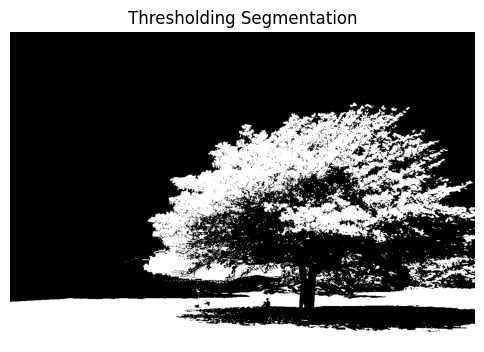

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function for thresholding segmentation
def thresholding_segmentation(image_path, threshold_value=127):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply binary thresholding
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Display the result
    plt.figure(figsize=(6, 6))
    plt.imshow(thresholded_image, cmap='gray')
    plt.title('Thresholding Segmentation')
    plt.axis('off')
    plt.show()


image_path = '/content/drive/MyDrive/img_1.jpeg'
thresholding_segmentation(image_path)


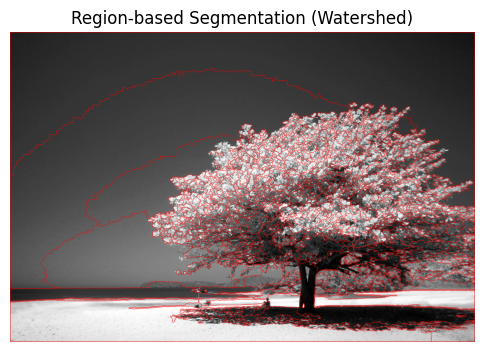

In [ ]:
def region_based_segmentation(image_path):
    # Load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform edge detection using Canny
    edges = cv2.Canny(blurred, 100, 200)

    # Create a mask and perform watershed
    ret, markers = cv2.connectedComponents(edges)
    markers = markers + 1
    markers[edges == 0] = 0

    # Apply watershed algorithm
    cv2.watershed(image, markers)
    image[markers == -1] = [0, 0, 255]  # Mark the boundaries in red

    # Display the result
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Region-based Segmentation (Watershed)')
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/img_1.jpeg'
region_based_segmentation(image_path)


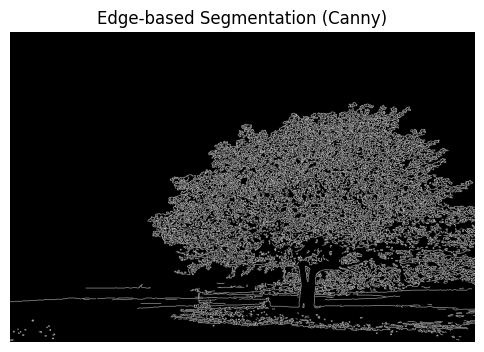

In [ ]:

def edge_based_segmentation(image_path):
    # Load the image and convert to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 100, 200)

    # Display the result
    plt.figure(figsize=(6, 6))
    plt.imshow(edges, cmap='gray')
    plt.title('Edge-based Segmentation (Canny)')
    plt.axis('off')
    plt.show()

image_path = '/content/drive/MyDrive/img_1.jpeg'
edge_based_segmentation(image_path)


Image Morphological Processing

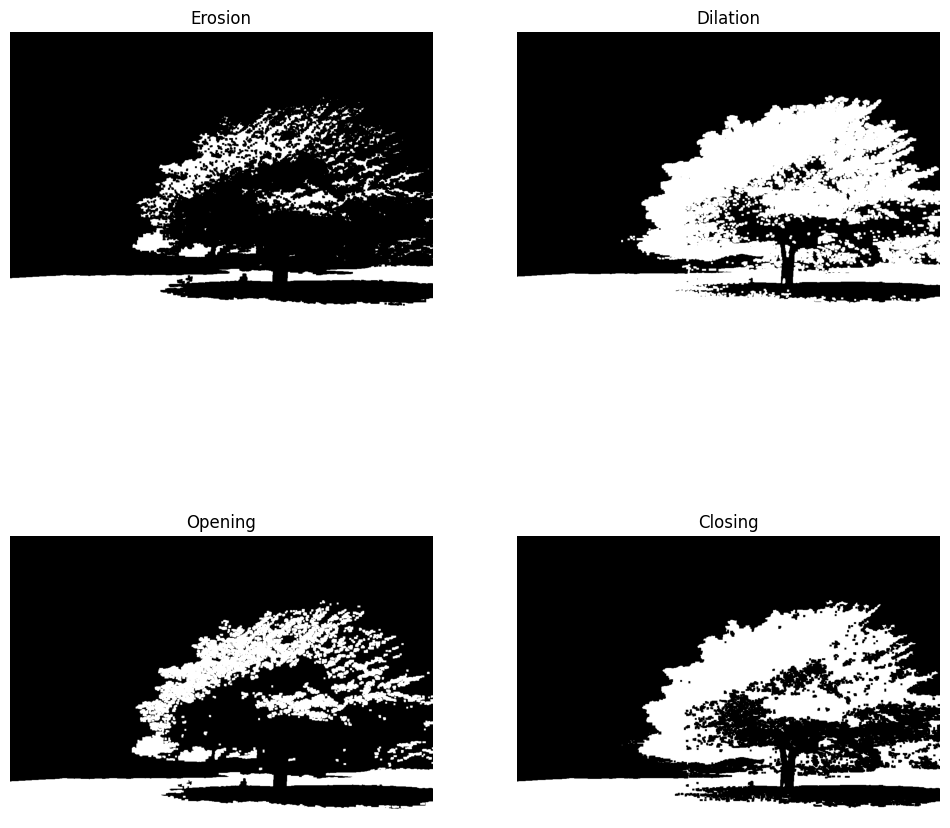

In [ ]:
def morphological_operations(image_path):
    # Load the image as a binary image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Create a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Apply morphological operations
    erosion = cv2.erode(binary_image, kernel, iterations=1)
    dilation = cv2.dilate(binary_image, kernel, iterations=1)
    opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    # Display the results
    plt.figure(figsize=(12, 12))

    plt.subplot(2, 2, 1)
    plt.imshow(erosion, cmap='gray')
    plt.title('Erosion')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(dilation, cmap='gray')
    plt.title('Dilation')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(opening, cmap='gray')
    plt.title('Opening')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(closing, cmap='gray')
    plt.title('Closing')
    plt.axis('off')

    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/img_1.jpeg'  # Replace with your image path
morphological_operations(image_path)


Image Registration

In [ ]:
def image_registration(image1_path, image2_path):
    # Load both images
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(image1, None)
    kp2, des2 = orb.detectAndCompute(image2, None)

    # Use BFMatcher to find best matches
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort matches based on distance (the lower the distance, the better the match)
    matches = sorted(matches, key = lambda x:x.distance)

    # Draw the matches on the images
    result_image = cv2.drawMatches(image1, kp1, image2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the result
    plt.figure(figsize=(10, 5))
    plt.imshow(result_image)
    plt.title('Image Registration using ORB')
    plt.axis('off')
    plt.show()

image1_path = 'image1.jpg'
image2_path = 'image2.jpg'
image_registration(image1_path, image2_path)
